# Introduction

_L'object de ce notebook est l'exploration des données des compétitions de Tennis de ATP de 2000 jusqu'au 2016 (Grand Slams, Masters Series, Masters Cup and International Series competitions). En effet, l'ensemble des données représente des informations de chanque match joué depuis 1968 jusqu'à 2017. Dans le cadre de cette étude, on va se baser sur les données de 2000 jusqu'à 2016 en premier lieu. En effet, l'ensemble de données de 1968 à 2016 est bien peuplé._

L'ensemble de données contient tous les détails des matches (la date, le lieu, type de tournois, gangant, perdant, les matches de tennis et sets joués, durée, les rangs des joueurs, l'age des joueurs, la taille des joueurs, les services gangants, les fautes et d'autres statistiques des joueurs.

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random
import os
import glob
from pylab import rcParams
sns.set_style('white')

%matplotlib inline

plt.rcParams.update({'font.size': 14})

In [114]:
#modification des paramètres
rcParams['figure.figsize'] = 40, 20
SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 25
HUGE_SIZE=30
plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=20)    
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=BIGGER_SIZE)     
plt.rc('figure', titlesize=BIGGER_SIZE)  


# Analyse récente sur les années (de 2000 à 2016)
## Chargement et exploration

En premier lieu, on commence par une analyse basées sur les histogrammes afin de comprendre la distribution des variables clés.

In [92]:
# Load data 
tennis_df_all = pd.read_csv("ATP.csv",  
                        dtype=str)

In [93]:
# Create new columns storing year and year/month attributes
tennis_df_all['tourney_yearmonth'] = tennis_df_all.tourney_date.astype(str).str[:6]
tennis_df_all['tourney_year'] = tennis_df_all.tourney_date.astype(str).str[:4]

tennis_df_all = tennis_df_all[tennis_df_all['tourney_year'].between('1968','2017')]

# Cast specific columns
tennis_df_all['winner_rank'] = tennis_df_all['winner_rank'].fillna(0).astype(int)
tennis_df_all['loser_rank'] = tennis_df_all['loser_rank'].fillna(0).astype(float)
tennis_df_all['winner_age'] = tennis_df_all['winner_age'].dropna().astype(float)
tennis_df_all['loser_age'] = tennis_df_all['loser_age'].dropna().astype(float)
tennis_df_all['winner_ht'] = tennis_df_all['winner_ht'].dropna().astype(int)
tennis_df_all['loser_ht'] = tennis_df_all['loser_ht'].dropna().astype(int)
tennis_df_all['w_svpt'] = tennis_df_all['w_svpt'].fillna(0).astype(int)
tennis_df_all['l_svpt'] = tennis_df_all['l_svpt'].fillna(0).astype(int)
tennis_df_all['w_ace'] = tennis_df_all['w_ace'].fillna(0).astype(int)
tennis_df_all['l_ace'] = tennis_df_all['l_ace'].fillna(0).astype(int)
tennis_df_all['w_df'] = tennis_df_all['w_df'].fillna(0).astype(int)
tennis_df_all['l_df'] = tennis_df_all['l_df'].fillna(0).astype(int)
tennis_df_all['w_bpSaved'] = tennis_df_all['w_bpSaved'].fillna(0).astype(int)
tennis_df_all['l_bpSaved'] = tennis_df_all['l_bpSaved'].fillna(0).astype(int)

tennis_df = tennis_df_all[tennis_df_all['tourney_year'].between('2000','2017')]


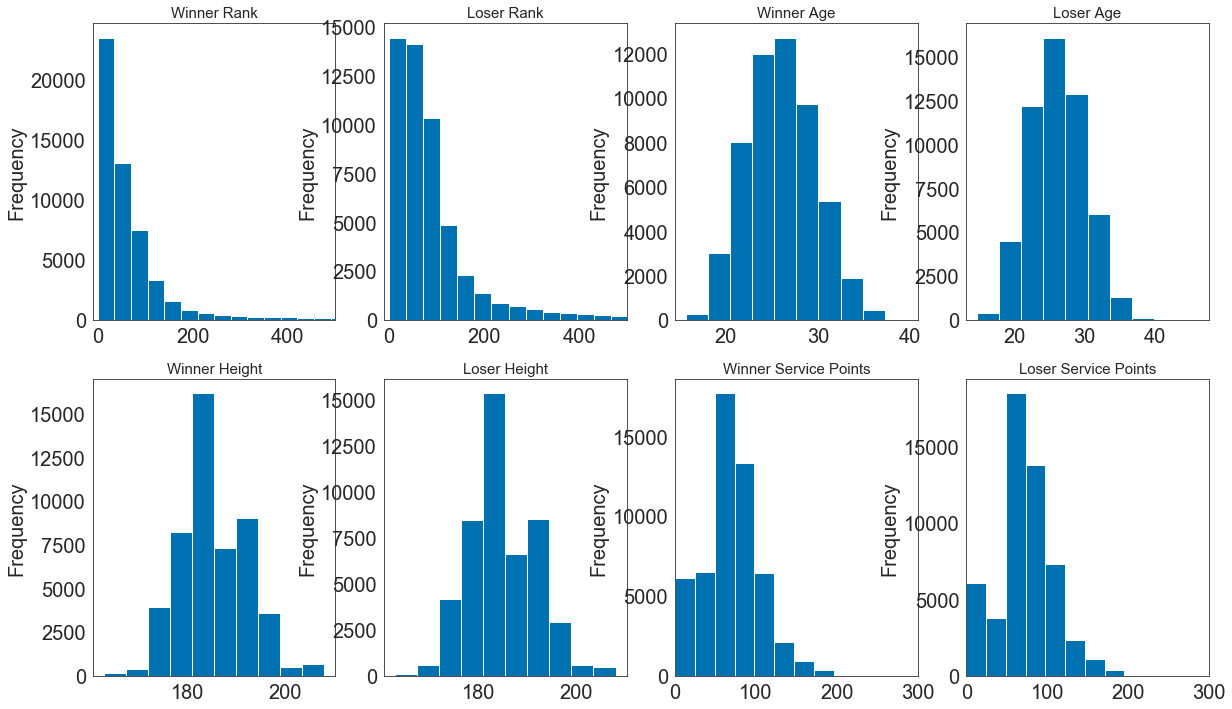

In [94]:
plt.figure(1, figsize=(20,12))
plt.subplot(2,4,1)
tennis_df['winner_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Winner Rank')

plt.subplot(2,4,2)
tennis_df['loser_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Loser Rank')

plt.subplot(2,4,3)
tennis_df['winner_age'].plot(kind='hist', title='Winner Age')

plt.subplot(2,4,4)
tennis_df['loser_age'].plot(kind='hist', title='Loser Age')

plt.subplot(2,4,5)
tennis_df['winner_ht'].plot(kind='hist', title='Winner Height')

plt.subplot(2,4,6)
tennis_df['loser_ht'].plot(kind='hist', title='Loser Height')

plt.subplot(2,4,7)
tennis_df['w_svpt'].plot(kind='hist', title='Winner Service Points', xlim=(0,300), bins=20)

plt.subplot(2,4,8)
tennis_df['l_svpt'].plot(kind='hist', title='Loser Service Points', xlim=(0,300), bins=20)

## Evolution des rangs des joueurs dans la compétition Grand Slam 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

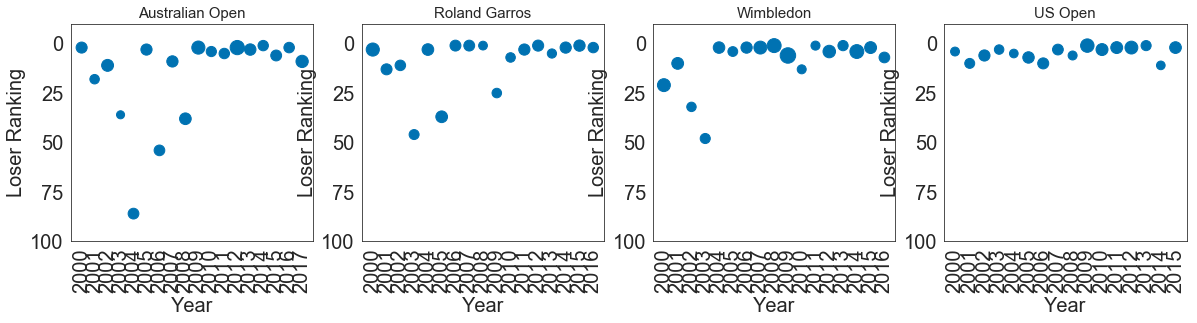

In [95]:
tennis_df_1 = tennis_df[~np.isnan(tennis_df['loser_rank']) & (tennis_df['tourney_name'] == 'Australian Open') & (tennis_df['round']=='F')]

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Australian Open")
plt.scatter(tennis_df_1['tourney_year'],tennis_df_1['loser_rank'], s=tennis_df_1['l_svpt'])
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(rotation=90)

tennis_df_2 = tennis_df[~np.isnan(tennis_df['loser_rank']) & (tennis_df['tourney_name'] == 'Roland Garros') & (tennis_df['round']=='F')].copy()

plt.subplot(1,4,2)
plt.title("Roland Garros")
plt.scatter(tennis_df_2['tourney_year'],tennis_df_2['loser_rank'], s=tennis_df_2['l_svpt'])
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(rotation=90)

tennis_df_3 = tennis_df[~np.isnan(tennis_df['loser_rank']) & (tennis_df['tourney_name'] == 'Wimbledon') & (tennis_df['round']=='F')].copy()

plt.subplot(1,4,3)
plt.title("Wimbledon")
plt.scatter(tennis_df_3['tourney_year'],tennis_df_3['loser_rank'], s=tennis_df_3['l_svpt'])
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(rotation=90)

tennis_df_4 = tennis_df[~np.isnan(tennis_df['loser_rank']) & (tennis_df['tourney_name'] == 'US Open') & (tennis_df['round']=='F')].copy()

plt.subplot(1,4,4)
plt.title("US Open")
plt.scatter(tennis_df_4['tourney_year'],tennis_df_4['loser_rank'], s=tennis_df_4['l_svpt'])
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(rotation=90)




Quatre diagrammes de dispersion sont générés avec le classement des perdants par an pour chacun des tournois du Grand Slam. La taille de la bulle est le nombre de points de service gagnés par les perdants.

**Au début des années 2000, il y avait plus de perdants et les pires classements se qualifiaient pour la finale dans la plupart des GS (sauf l'US Open).**

## Répartition des services gagnants par type de surface

[Text(0, 0.5, 'Aces'), Text(0.5, 0, 'Surface')]

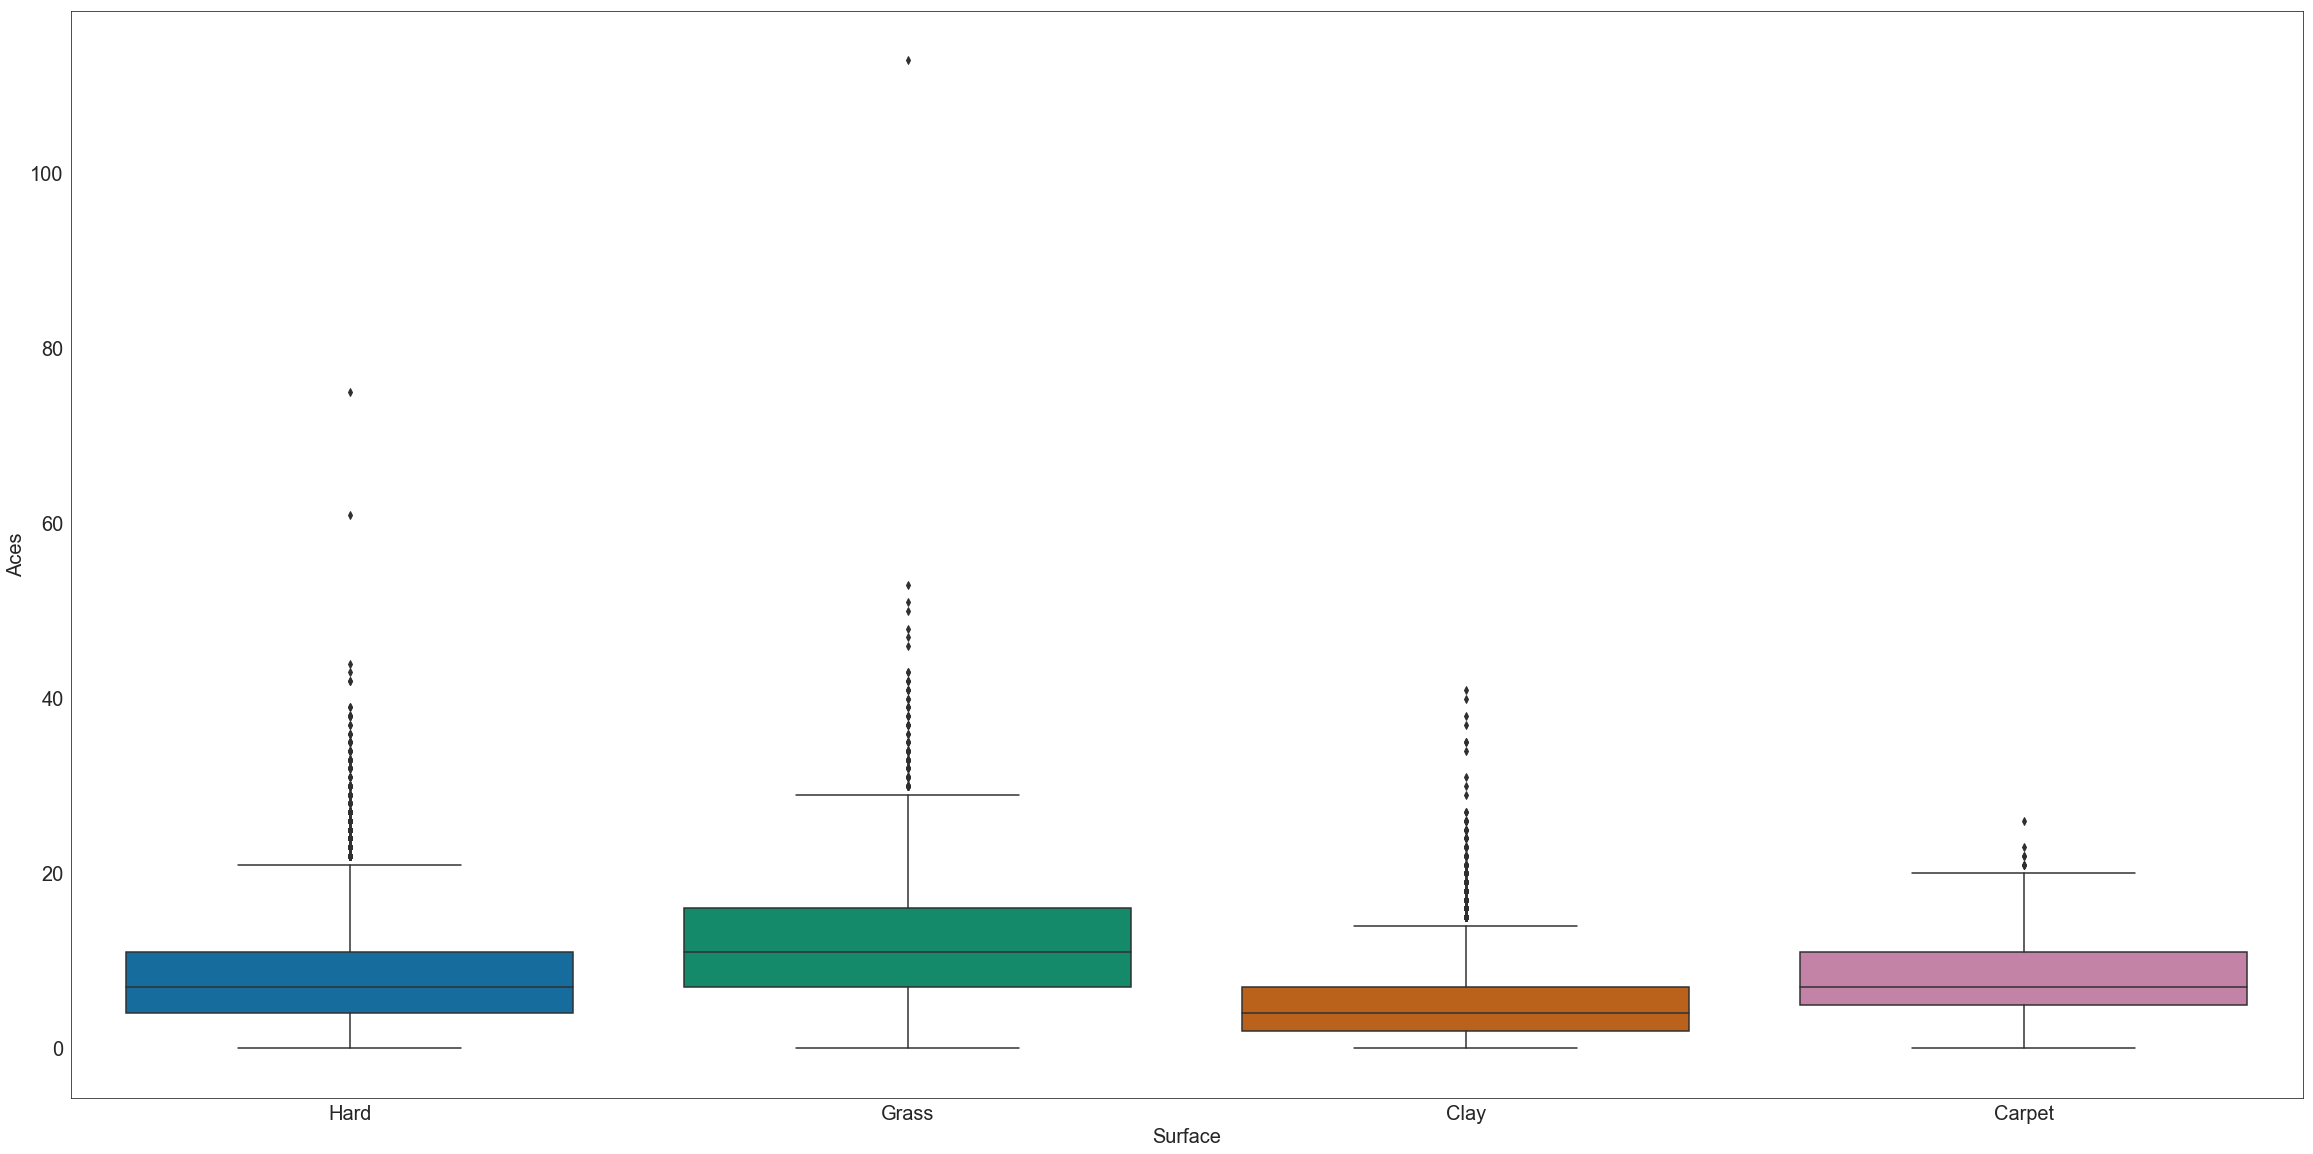

In [96]:
tennis_df_h = tennis_df[tennis_df['tourney_level'].astype(str).isin(['G','M'])]
g = sns.boxplot(x="surface", y="w_ace", data=tennis_df_h)
g.set(xlabel='Surface', ylabel='Aces')



Nous pouvons constater dans ce boxplot que l'incidence des as est supérieure à celle des terrains en terre battue et en dur


## Evolution des tops pays représentés par leurs joueurs

Text(0.5, 1.0, 'Serbia in GS')

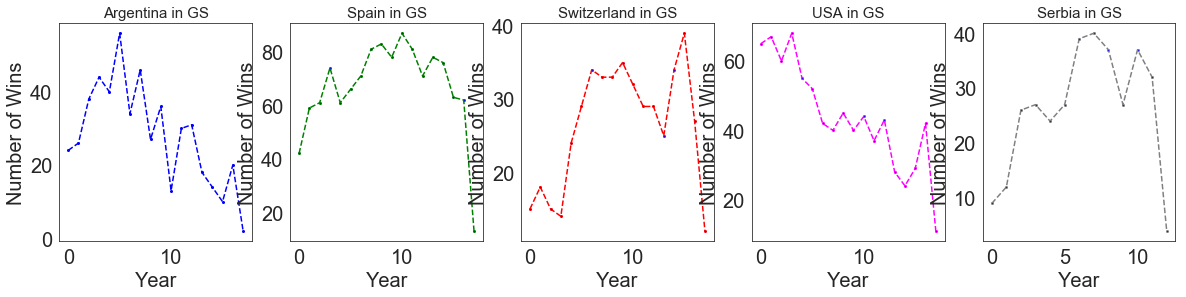

In [97]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)

s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['ARG']))].groupby(['tourney_year','winner_ioc']).agg('count')
s = s['tourney_id']
plt.plot(s.values, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.title('Argentina in GS')

plt.subplot(1,5,2)
s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['ESP']))].groupby(['tourney_year','winner_ioc']).agg('count')
s = s['tourney_id']
plt.plot(s.values, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.title('Spain in GS')

plt.subplot(1,5,3)
s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['SUI']))].groupby(['tourney_year','winner_ioc']).agg('count')
s = s['tourney_id']
plt.plot(s.values, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.title('Switzerland in GS')

plt.subplot(1,5,4)
s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['USA']))].groupby(['tourney_year','winner_ioc']).agg('count')
s = s['tourney_id']
plt.plot(s.values, color='magenta', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.title('USA in GS')

plt.subplot(1,5,5)
s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin(['SRB']))].groupby(['tourney_year','winner_ioc']).agg('count')
s = s['tourney_id']
plt.plot(s.values, color='grey', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2)
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.title('Serbia in GS')


Il y a une **baisse du nombre de victoires chez les joueurs d'Argentine et des États-Unis** (Les meilleurs joueurs prennent leur retraite -> Agassi, Sampras, Coria, Nalbandian)

Il y a une augmentation **du nombre de victoires dans les cas de l'Espagne, de la Suisse et de la Serbie** (Nouveaux grands joueurs -> Nadal, Federer et Djokovic)

## Top des services gagnants, doubles fautes et points sauvés

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


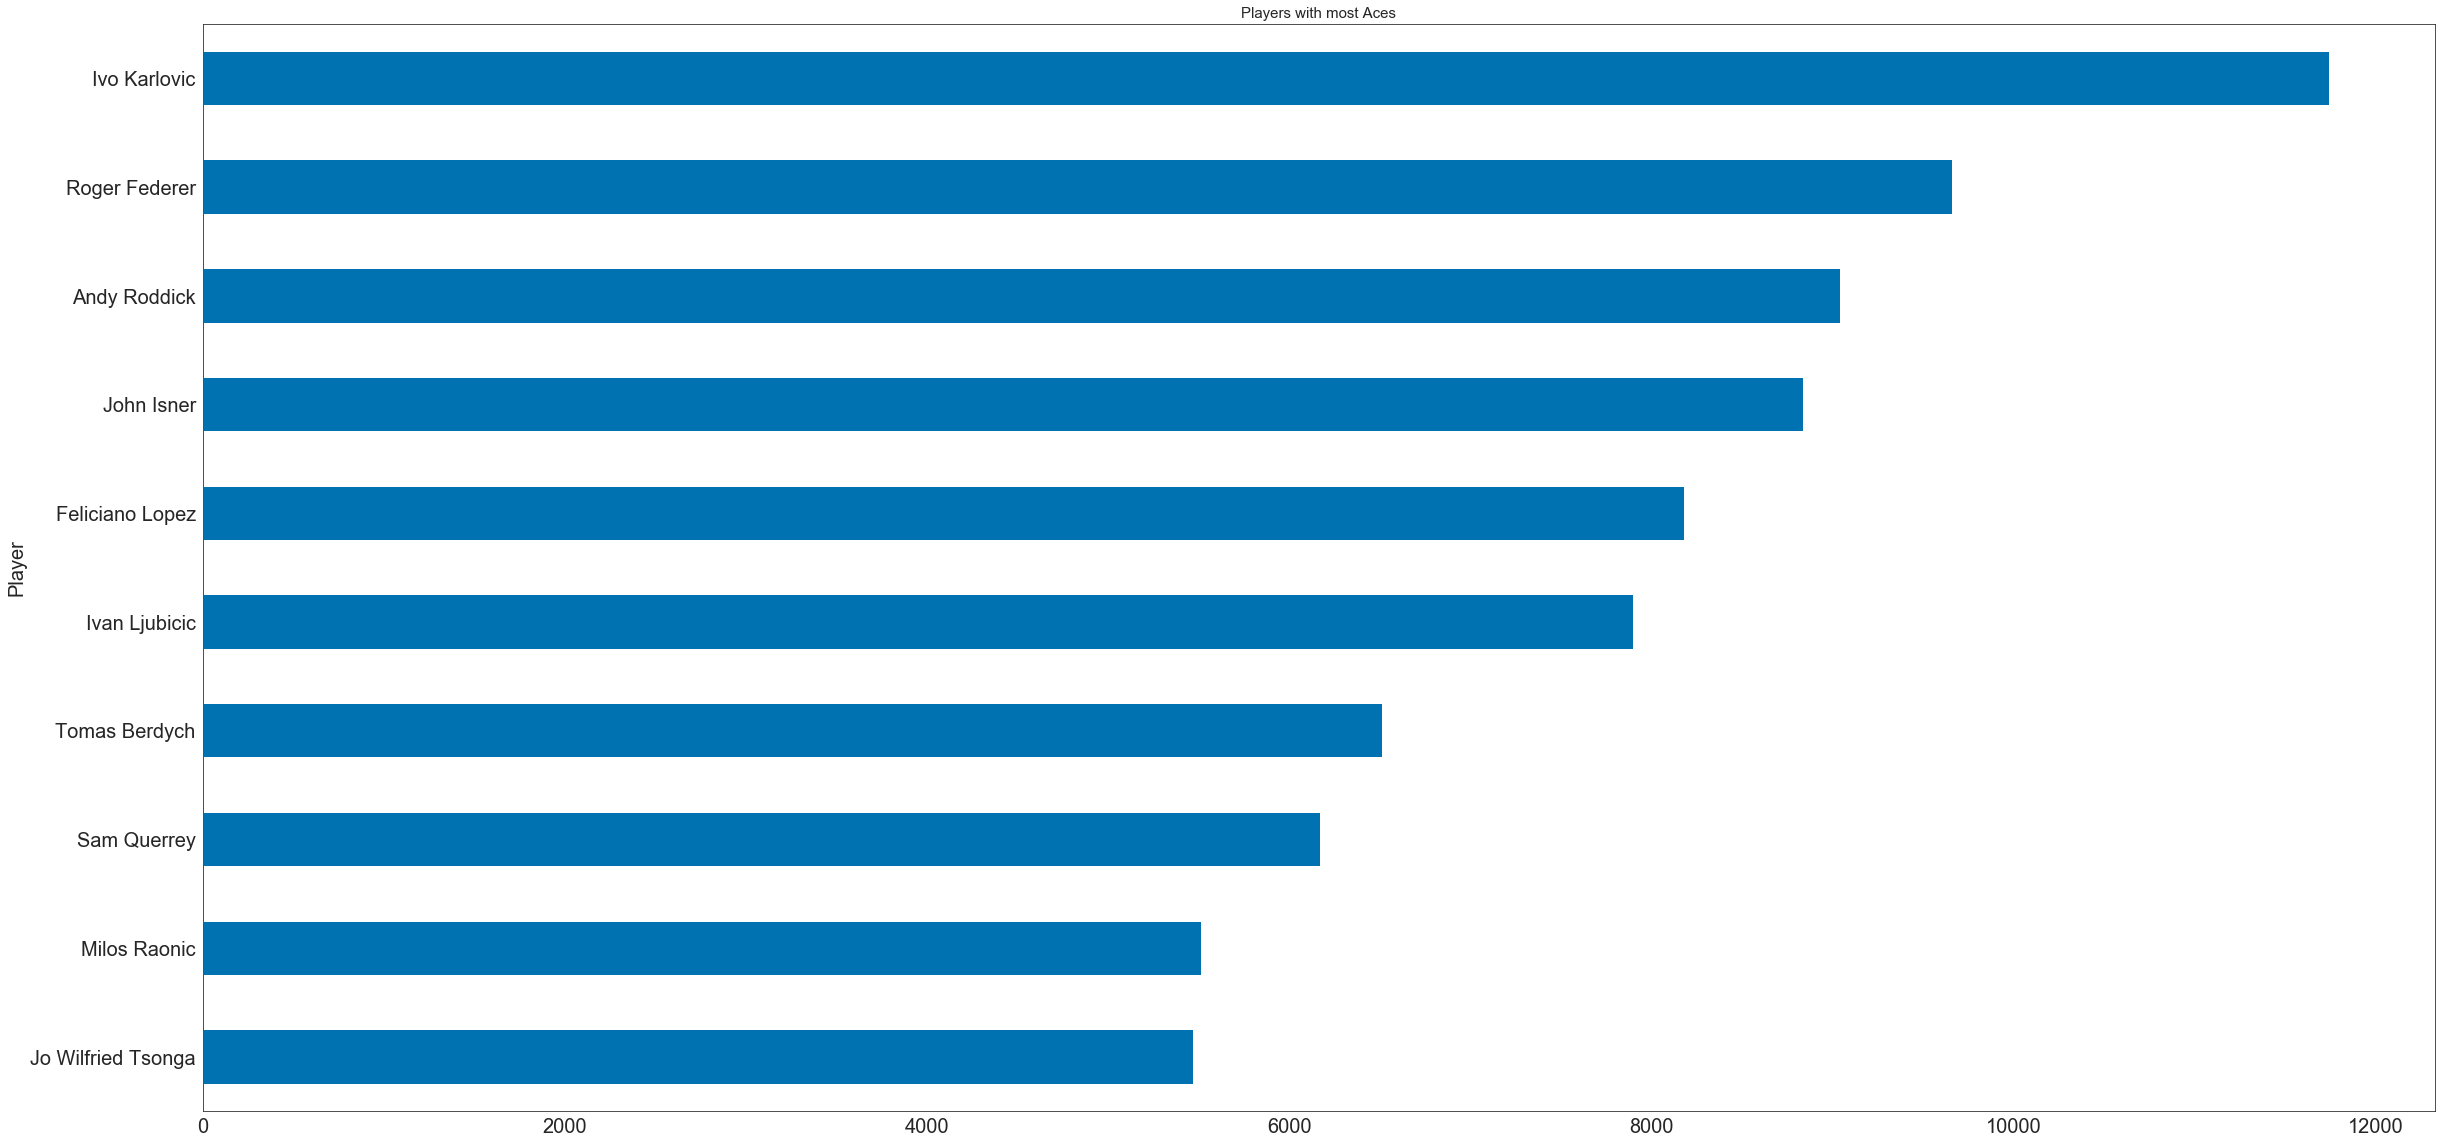

In [98]:
sw = tennis_df.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['l_ace']+r['w_ace']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)
final.plot('Player','Aces', kind='barh', title='Players with most Aces', legend=False)

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


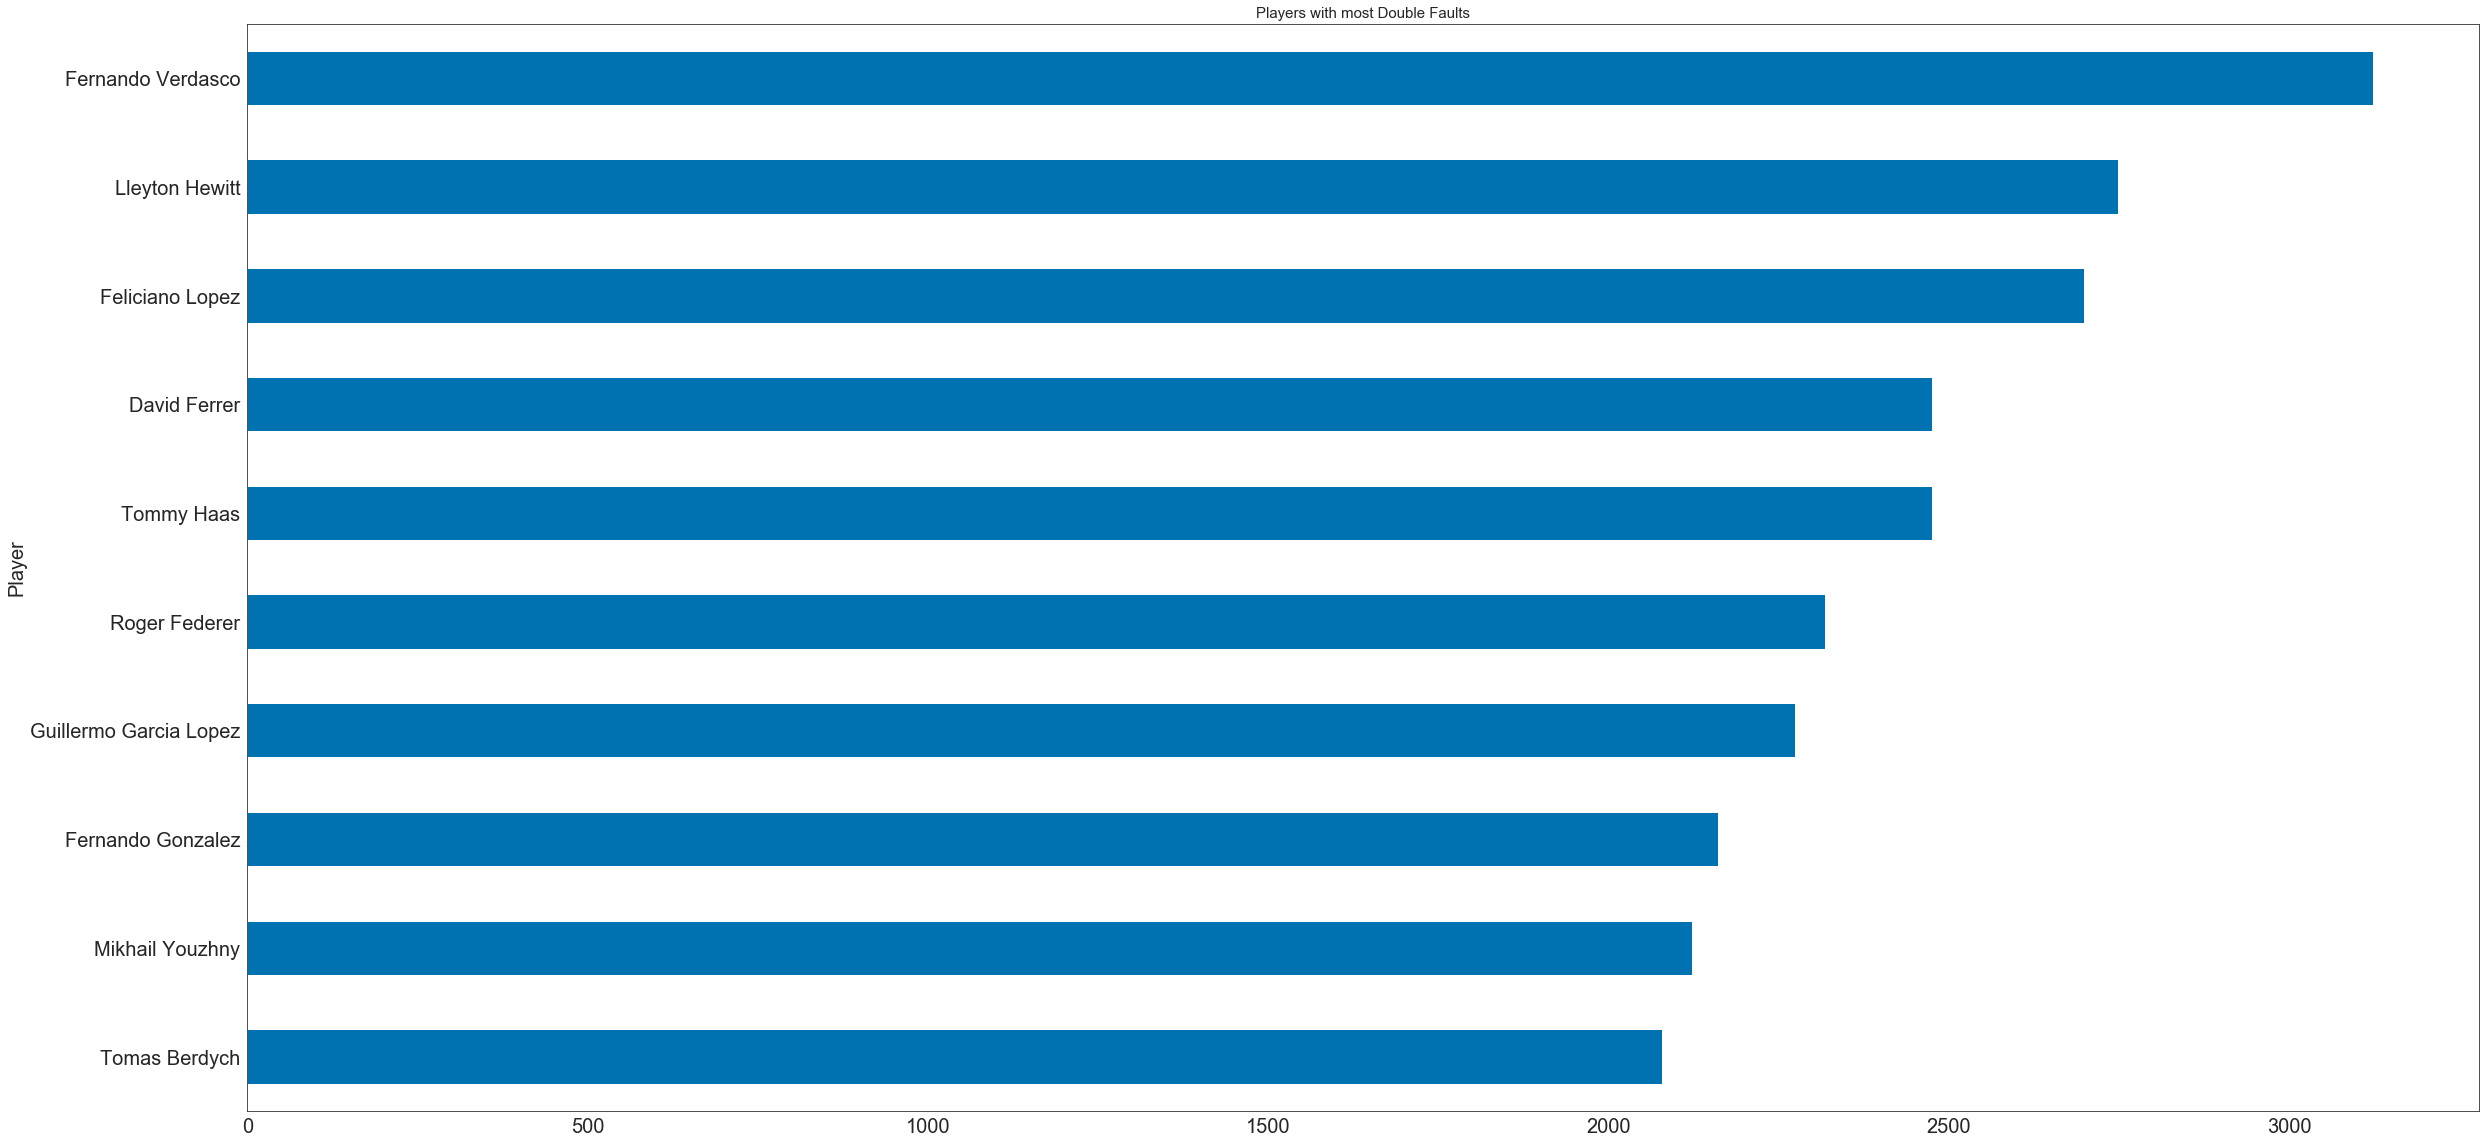

In [99]:
sw = tennis_df.groupby(['winner_name']).agg({'w_df':'sum'}).fillna(0).sort_values(['w_df'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_df':'sum'}).fillna(0).sort_values(['l_df'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['dfs'] = r['l_df']+r['w_df']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','DoubleFaults']
final = final.sort_values('DoubleFaults',ascending=True)
final.plot('Player','DoubleFaults', kind='barh', title='Players with most Double Faults', legend=False)

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


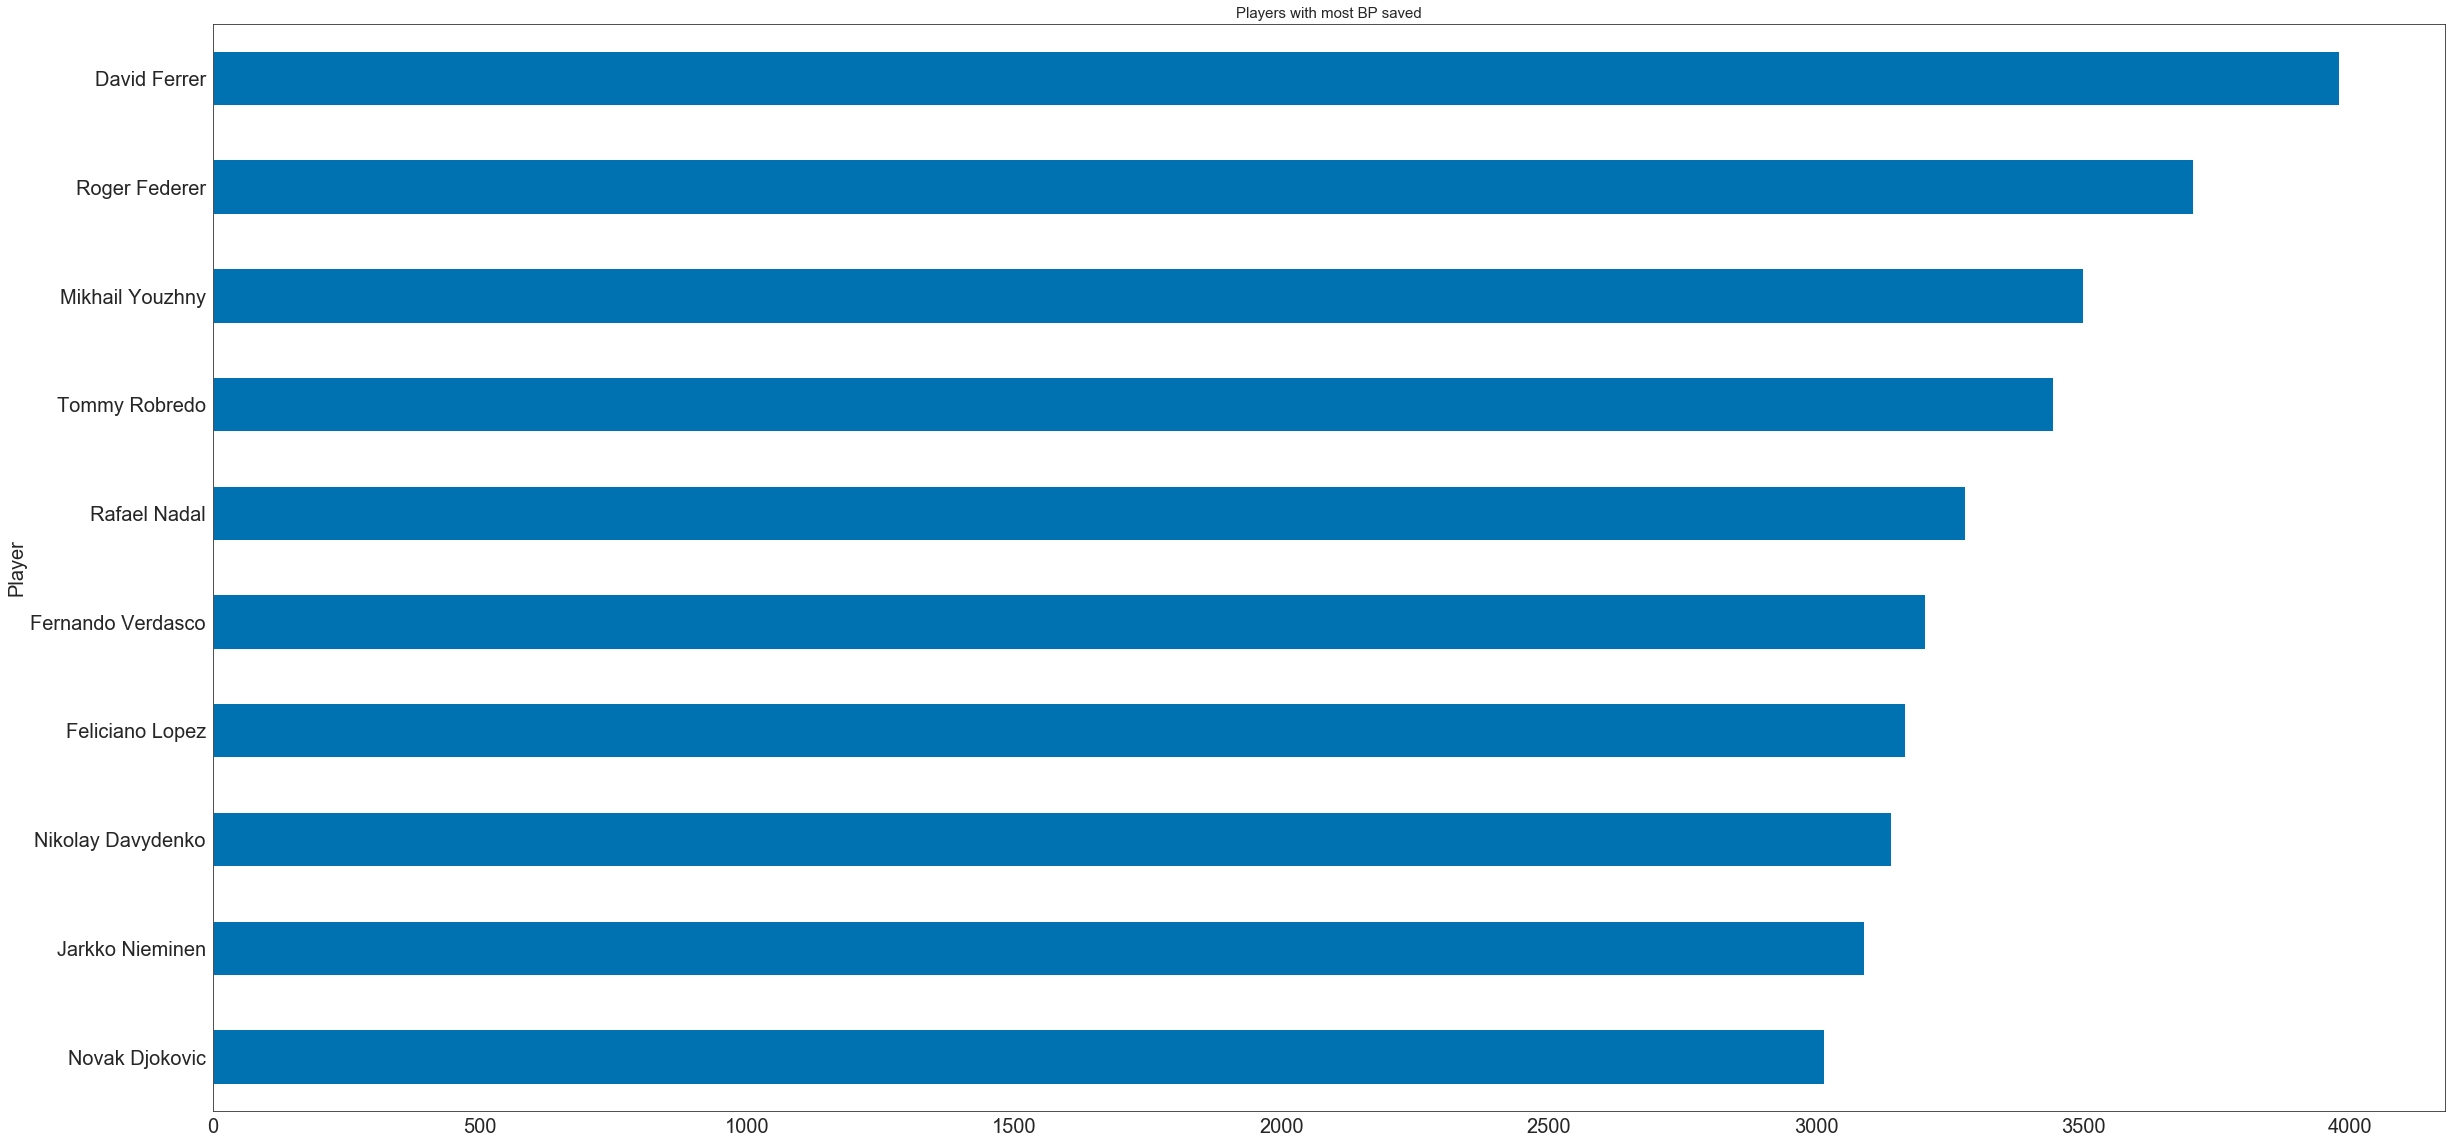

In [100]:
sw = tennis_df.groupby(['winner_name']).agg({'w_bpSaved':'sum'}).fillna(0).sort_values(['w_bpSaved'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_bpSaved':'sum'}).fillna(0).sort_values(['l_bpSaved'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['dfs'] = r['l_bpSaved']+r['w_bpSaved']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','BreakPointsSaved']
final = final.sort_values('BreakPointsSaved',ascending=True)
final.plot('Player','BreakPointsSaved', kind='barh', title='Players with most BP saved', legend=False)

## Evolution of tops joueurs dans les 15 derniéres années

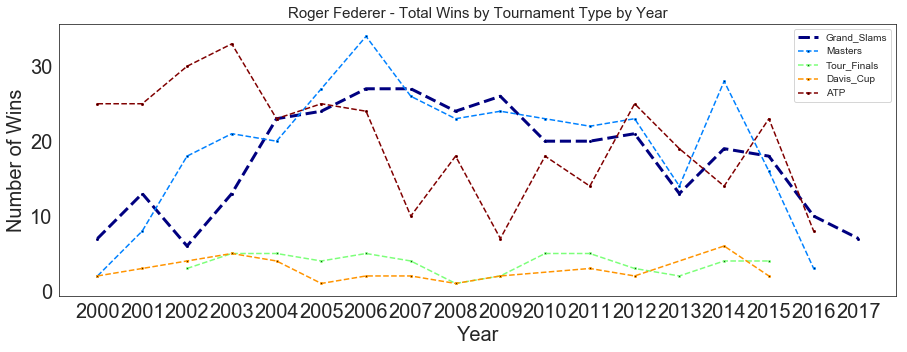

In [101]:
pldf_1 = tennis_df[(tennis_df['winner_name'] == 'Roger Federer')].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
pldf_2 = pldf_1['tourney_id'].reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Roger Federer - Total Wins by Tournament Type by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tourney_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2, linewidth=3)
plt.plot(pldf_2[pldf_2['tourney_level']=='M']['tourney_year'], pldf_2[pldf_2['tourney_level']=='M']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='F']['tourney_year'], pldf_2[pldf_2['tourney_level']=='F']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='D']['tourney_year'], pldf_2[pldf_2['tourney_level']=='D']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='A']['tourney_year'], pldf_2[pldf_2['tourney_level']=='A']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right', prop={'size': 10})


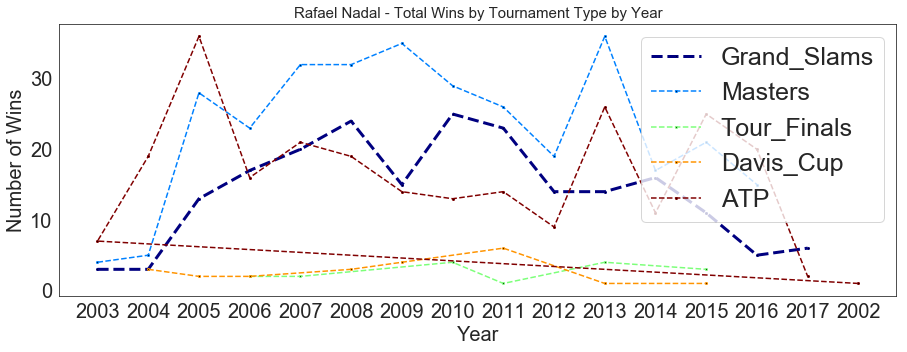

In [121]:
pldf_1 = tennis_df[(tennis_df['winner_name'] == 'Rafael Nadal')].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
pldf_2 = pldf_1['tourney_id'].reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Rafael Nadal - Total Wins by Tournament Type by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tourney_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2, linewidth=3)
plt.plot(pldf_2[pldf_2['tourney_level']=='M']['tourney_year'], pldf_2[pldf_2['tourney_level']=='M']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='F']['tourney_year'], pldf_2[pldf_2['tourney_level']=='F']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='D']['tourney_year'], pldf_2[pldf_2['tourney_level']=='D']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='A']['tourney_year'], pldf_2[pldf_2['tourney_level']=='A']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper right')

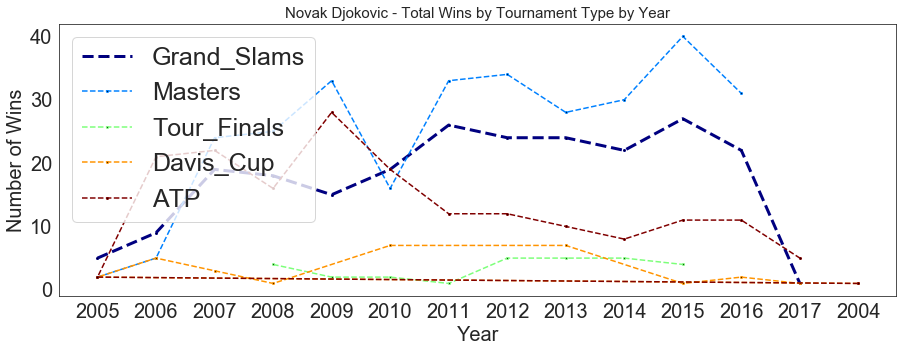

In [122]:
pldf_1 = tennis_df[(tennis_df['winner_name'] == 'Novak Djokovic')].groupby(['tourney_year','tourney_level'], as_index=False).agg(['count'])
pldf_2 = pldf_1['tourney_id'].reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Novak Djokovic - Total Wins by Tournament Type by Year')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tourney_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2, linewidth=3)
plt.plot(pldf_2[pldf_2['tourney_level']=='M']['tourney_year'], pldf_2[pldf_2['tourney_level']=='M']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='F']['tourney_year'], pldf_2[pldf_2['tourney_level']=='F']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='D']['tourney_year'], pldf_2[pldf_2['tourney_level']=='D']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)
plt.plot(pldf_2[pldf_2['tourney_level']=='A']['tourney_year'], pldf_2[pldf_2['tourney_level']=='A']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2)

plt.legend(['Grand_Slams', 'Masters', 'Tour_Finals', 'Davis_Cup', 'ATP'], loc='upper left')

## Joueurs ayant gagné les tournois les plus importants

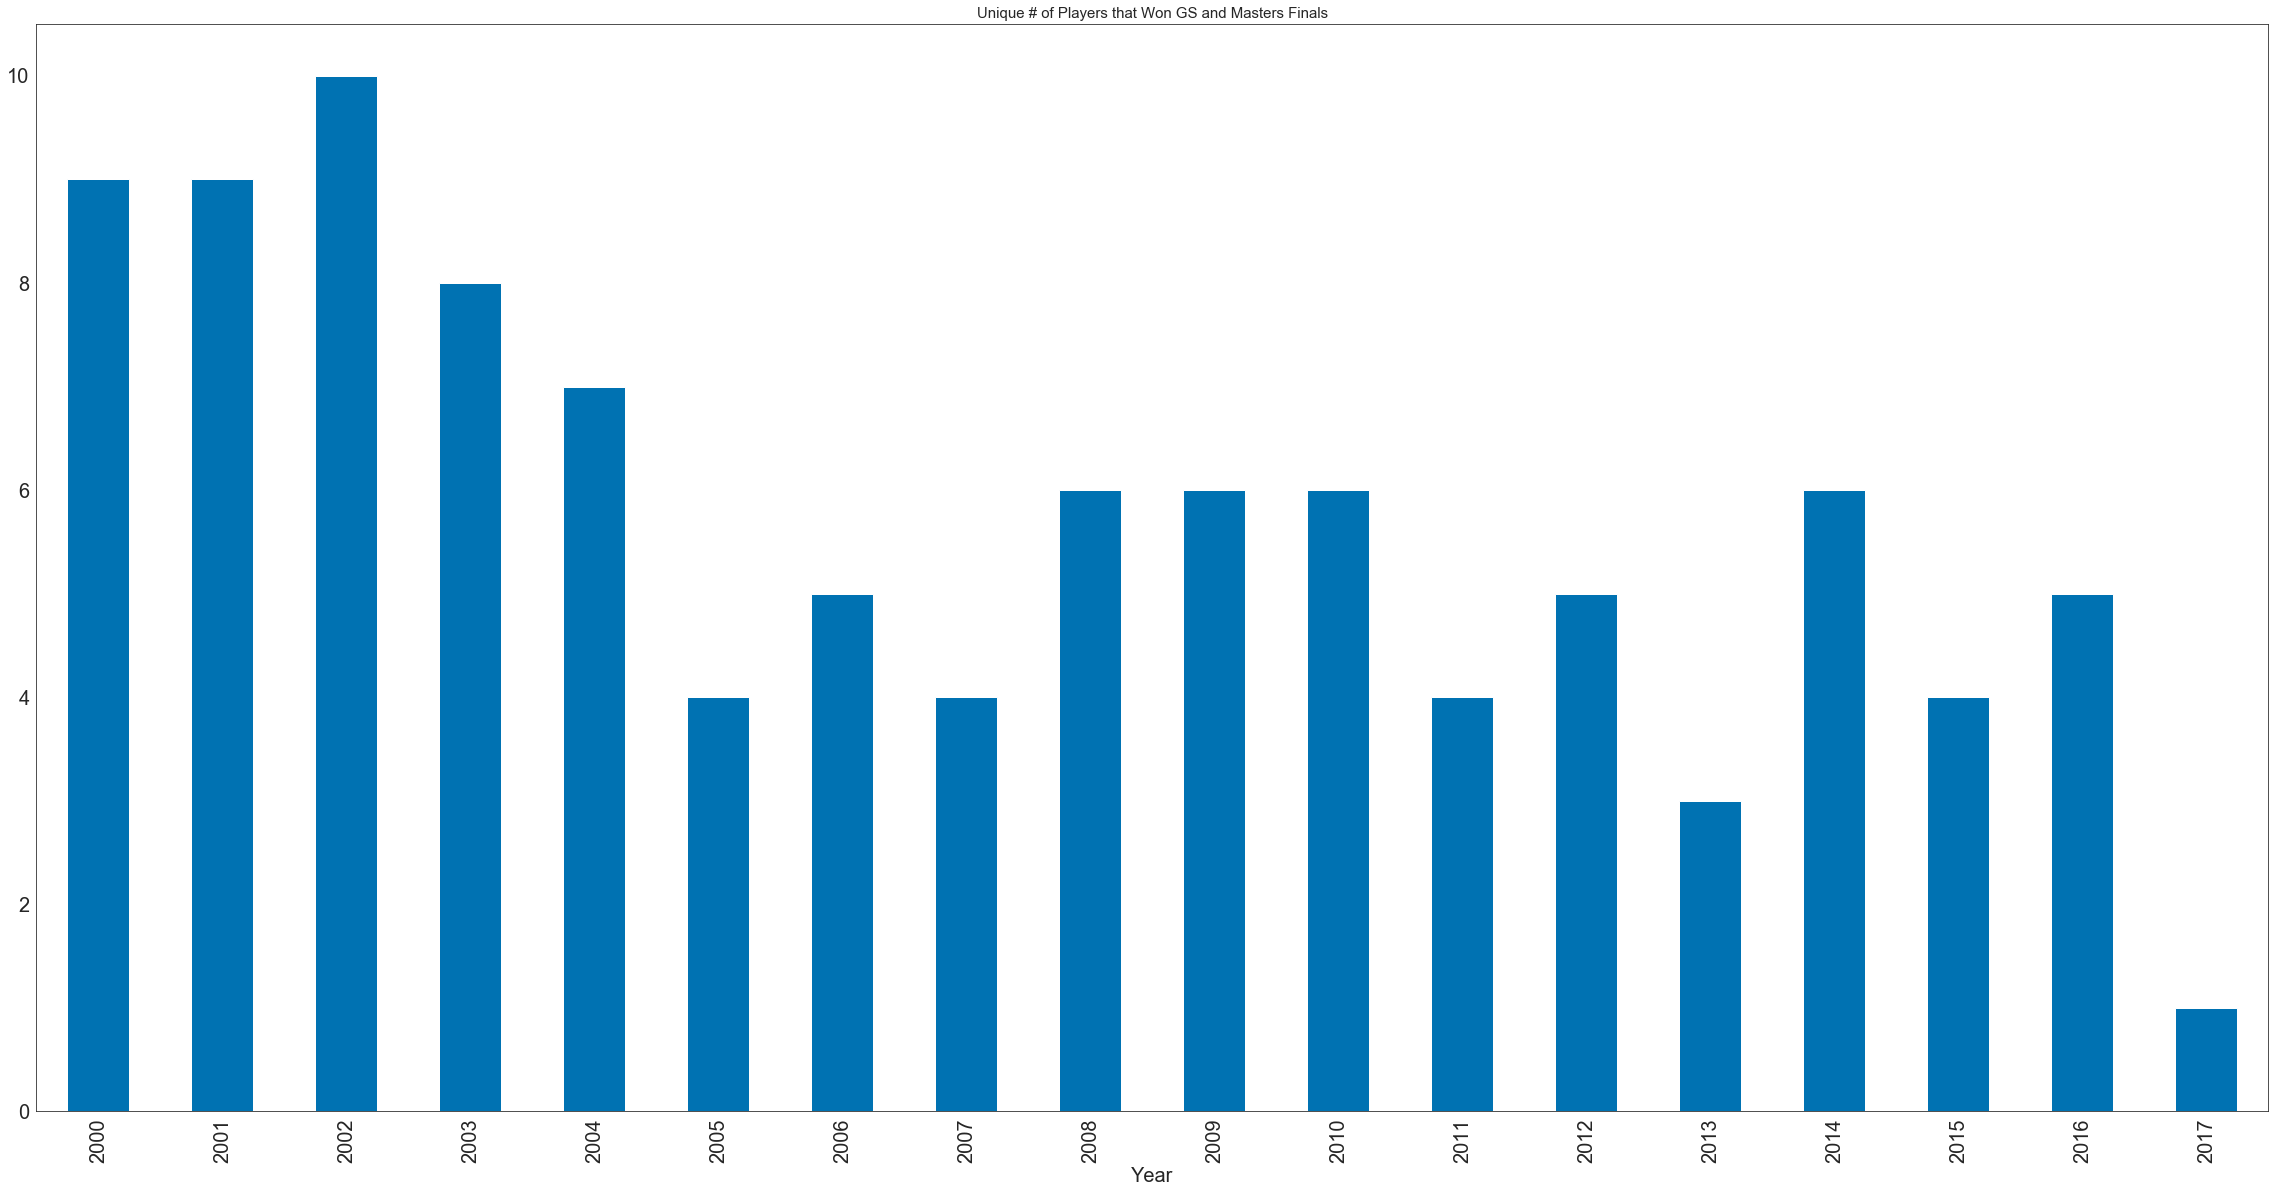

In [104]:
# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_level'].isin(['M','G']))].groupby(['tourney_year']).agg({'winner_name':'nunique'})
t= s.reset_index()
t.columns=['Year','Unique_Winners']
t.plot('Year', 'Unique_Winners', kind='bar', title='Unique # of Players that Won GS and Masters Finals', legend=False)

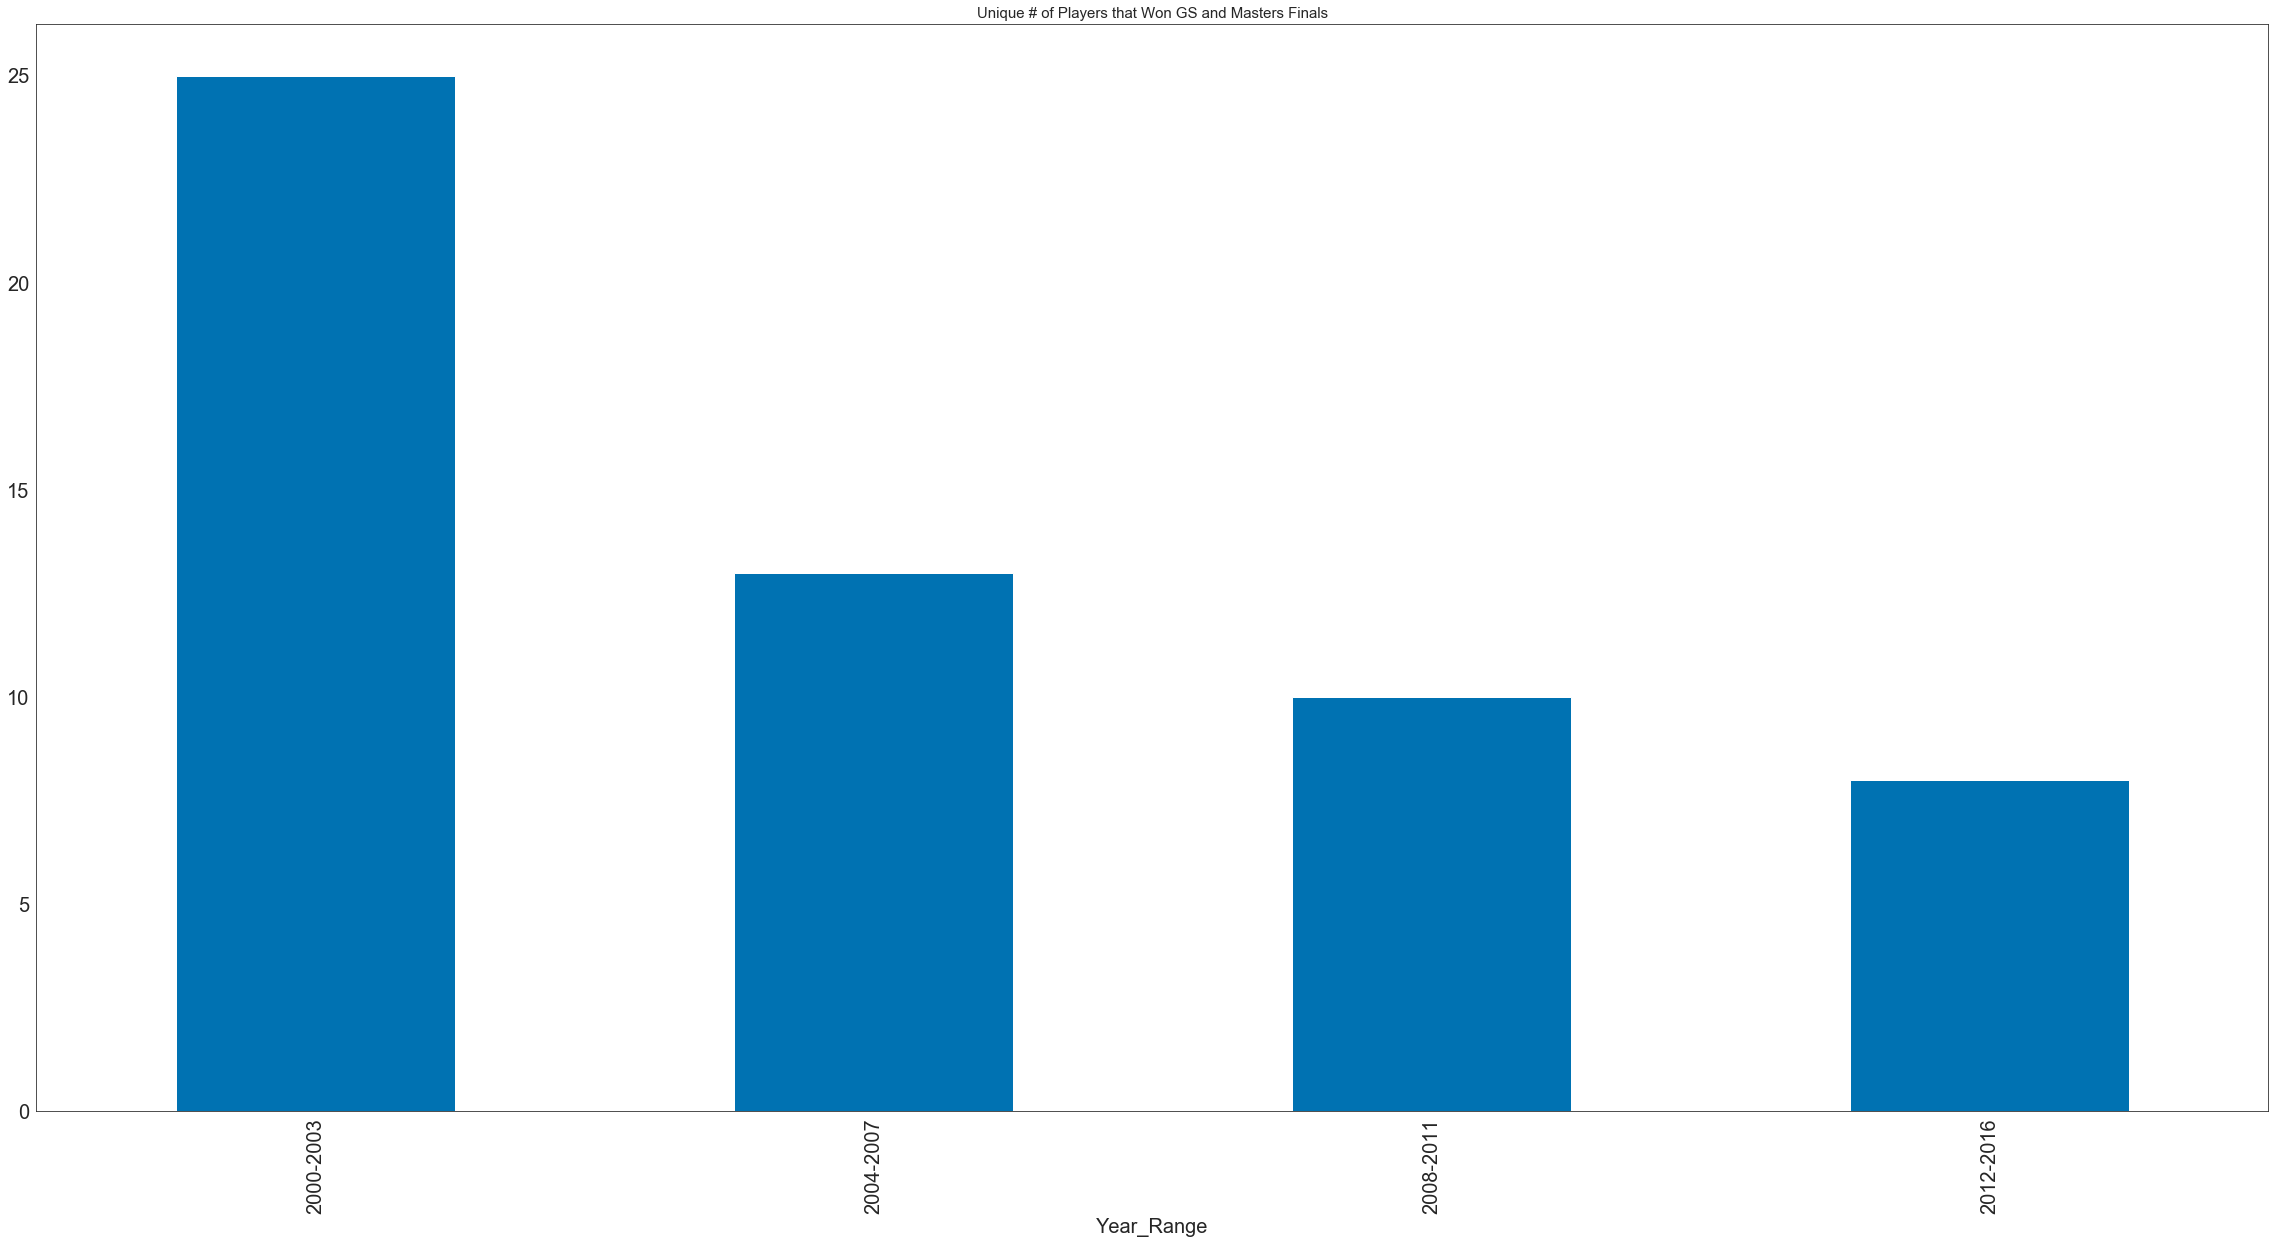

In [115]:
# Unique number of tournament winner per year from 2000 to 2016 (show dominance of top players)
s = tennis_df_all[(tennis_df_all['round']=='F')&(tennis_df_all['tourney_level'].isin(['M','G']))&(tennis_df_all['tourney_year'].between('2000','2003'))].agg({'winner_name':'nunique'})
t = tennis_df_all[(tennis_df_all['round']=='F')&(tennis_df_all['tourney_level'].isin(['M','G']))&(tennis_df_all['tourney_year'].between('2004','2007'))].agg({'winner_name':'nunique'})
u = tennis_df_all[(tennis_df_all['round']=='F')&(tennis_df_all['tourney_level'].isin(['M','G']))&(tennis_df_all['tourney_year'].between('2008','2011'))].agg({'winner_name':'nunique'})
v = tennis_df_all[(tennis_df_all['round']=='F')&(tennis_df_all['tourney_level'].isin(['M','G']))&(tennis_df_all['tourney_year'].between('2012','2016'))].agg({'winner_name':'nunique'})

s['2000-2003'] = s['winner_name']
s=s.drop('winner_name')
t['2004-2007'] = t['winner_name']
t=t.drop('winner_name')
u['2008-2011'] = u['winner_name']
u=u.drop('winner_name')
v['2012-2016'] = v['winner_name']
v=v.drop('winner_name')

dfl = [s,t,u,v]
dfs = pd.concat(dfl)
x=pd.DataFrame(dfs, columns=['Unique_Count']).reset_index()
x.columns=['Year_Range','Unique_Winners']
x.plot('Year_Range', 'Unique_Winners', kind='bar', title='Unique # of Players that Won GS and Masters Finals', legend=False)


## Relation entre les services gagants et la taille des joueurs

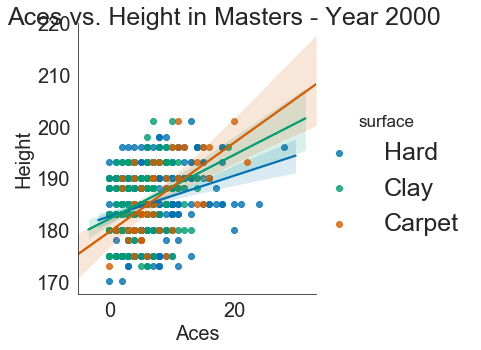

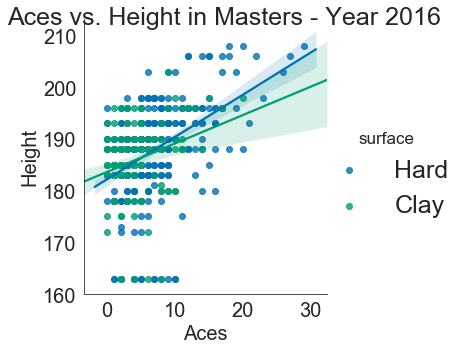

In [116]:

g1 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=tennis_df[(tennis_df['tourney_level'].isin(['M']))&(tennis_df['tourney_year']=='2000')])
g1.fig.suptitle('Aces vs. Height in Masters - Year 2000') 
g1.set(xlabel='Aces', ylabel='Height')

g2 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=tennis_df[(tennis_df['tourney_level'].isin(['M']))&(tennis_df['tourney_year']=='2016')])
g2.fig.suptitle('Aces vs. Height in Masters - Year 2016')
g2.set(xlabel='Aces', ylabel='Height')




En comparant les nuages **de points de 2016 à 2000, nous remarquons que, ces dernières années, le rapport entre les services gagnants et la taille des joueurs est plus élevé.** Le nombre de joueurs plus grands avec plus d'as a également augmenté.

## Efficacité des meilleurs joueurs par type de surface

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


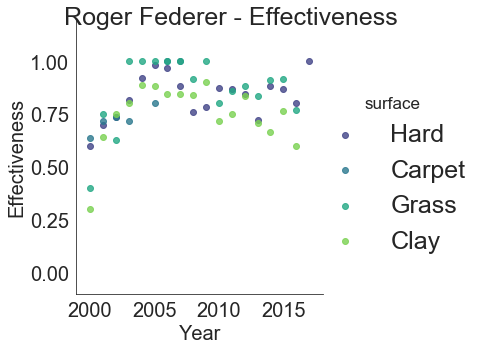

In [117]:
pw = tennis_df[(tennis_df['winner_name'] == 'Roger Federer')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Roger Federer')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

#sns.swarmplot(x="tourney_year", y="r_eff", hue="surface", data=dfs_final);

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
#sns.barplot(x="tourney_year", y="r_eff", hue="surface", data=dfs_final)
g.fig.suptitle('Roger Federer - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


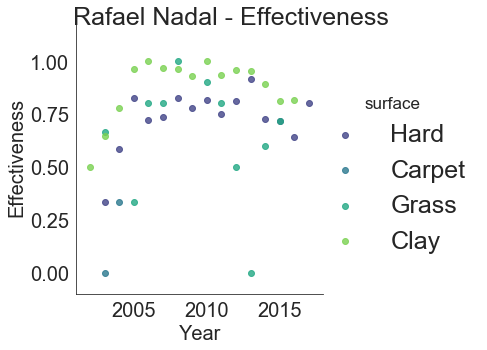

In [118]:
pw = tennis_df[(tennis_df['winner_name'] == 'Rafael Nadal')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Rafael Nadal')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
g.fig.suptitle('Rafael Nadal - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


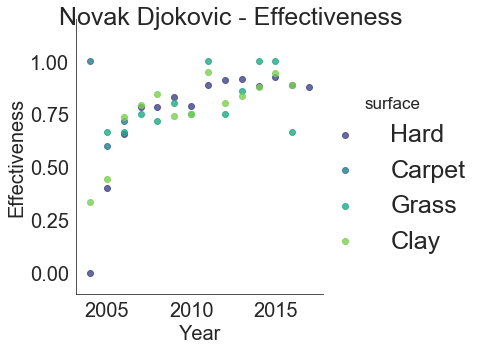

In [119]:
pw = tennis_df[(tennis_df['winner_name'] == 'Novak Djokovic')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Novak Djokovic')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
g.fig.suptitle('Novak Djokovic - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))

c:\users\m.trabelsi\desktop\pp\env-pp\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


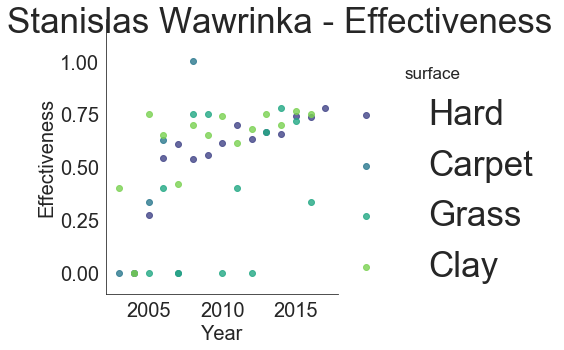

In [110]:
pw = tennis_df[(tennis_df['winner_name'] == 'Stanislas Wawrinka')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pww = pw['tourney_id'].reset_index()

pl = tennis_df[(tennis_df['loser_name'] == 'Stanislas Wawrinka')].groupby(['tourney_year','surface'], as_index=False).agg(['count'])
pll = pl['tourney_id'].reset_index()

pww.columns = ['tourney_year','surface','wins']
pll.columns = ['tourney_year','surface','loses']

dfs = (pww,pll)

dfs_concat = pd.concat(dfs)

dfs_final = dfs_concat.fillna(0).groupby(['tourney_year','surface']).agg({'wins':'sum','loses':'sum'}).reset_index()

dfs_final['r_eff'] = np.where(dfs_final['loses']>0, dfs_final['wins']/(dfs_final['wins']+dfs_final['loses']), 1)
dfs_final['tourney_year'] = dfs_final['tourney_year'].astype(int)

g = sns.lmplot(x='tourney_year', y='r_eff', hue='surface', fit_reg=False, data=dfs_final, palette='viridis', hue_order=['Hard','Carpet','Grass','Clay'])
g.fig.suptitle('Stanislas Wawrinka - Effectiveness')
g.set(xlabel='Year', ylabel='Effectiveness')
g.set(ylim=(-0.1,1.2))


On peut remarquer que la surface des terrains est un facteur de succès dans les matchs. En effet, d'après les graphes, le rendement des joueurs est corrélé avec le type de surface des terrains. Par conséquent, la variable surface peut être une variable explicative pertinente dans les modèles prédictifs implémentés dans le notebook n°3.

# Analyse depuis 1968 jusqu'à 2016

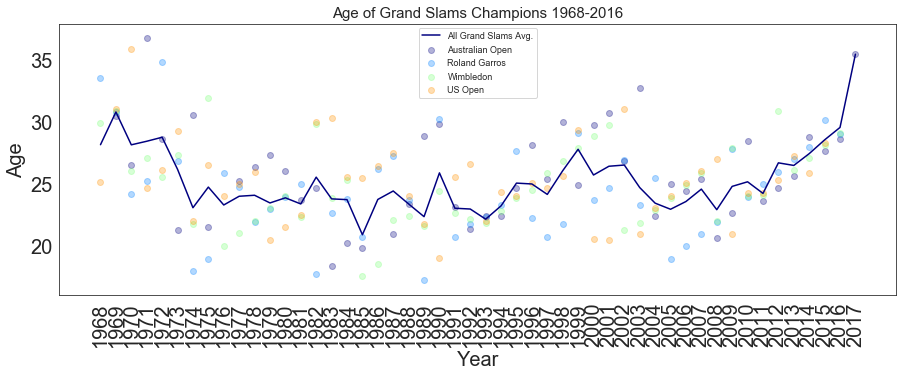

In [120]:
# What is the average age of Grand Slams' players from 1968 up to 2016?
tennis_df_win=tennis_df_all[tennis_df_all['tourney_level'].isin(['G'])&(tennis_df_all['round']=='F')].dropna(subset=['winner_age'])
dfw = tennis_df_win[['tourney_year','tourney_name','winner_name','winner_age']]
dfw.columns = ['tourney_year','tourney_name','player','age']

dfs_final = dfw.groupby(['tourney_year','tourney_name']).agg({'age':'mean'}).reset_index()
dfs_final_2 = dfs_final.groupby(['tourney_year']).agg({'age':'mean'}).reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Age of Grand Slams Champions 1968-2016')
plt.ylabel('Age')
plt.xlabel('Year')

plt.plot(dfs_final_2['tourney_year'], dfs_final_2['age'])
plt.scatter(dfs_final[dfs_final['tourney_name']=='Australian Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Australian Open']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Roland Garros']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Roland Garros']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='Wimbledon']['tourney_year'], dfs_final[dfs_final['tourney_name']=='Wimbledon']['age'], alpha=0.3)
plt.scatter(dfs_final[dfs_final['tourney_name']=='US Open']['tourney_year'], dfs_final[dfs_final['tourney_name']=='US Open']['age'], alpha=0.3)

plt.legend(['All Grand Slams Avg.','Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'], loc='upper center',prop={'size': 9})
plt.xticks(rotation=90);